In [1]:
from analyze_utils import read_sharded_dataset

train_dataset = read_sharded_dataset(
    path="/home/stud03/DanielH/llm_outputs/rationales/cqa-train"
)

test_dataset = read_sharded_dataset(
    path="/home/stud03/DanielH/llm_outputs/rationales/cqa-test"
)

In [2]:
train_dataset.features

{'id': Value(dtype='string', id=None),
 'question': Value(dtype='string', id=None),
 'choices': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'answer': Value(dtype='string', id=None),
 'abstractive_explanation': Value(dtype='string', id=None),
 'extractive_explanation': Value(dtype='string', id=None),
 'few_shot_positive_prompt': Value(dtype='string', id=None),
 'few_shot_negative_prompt': Value(dtype='string', id=None),
 'zero_shot_positive_prompt': Value(dtype='string', id=None),
 'zero_shot_negative_prompt': Value(dtype='string', id=None),
 'few_shot_positive_rationale': Value(dtype='string', id=None),
 'few_shot_negative_rationale': Value(dtype='string', id=None),
 'zero_shot_positive_rationale': Value(dtype='string', id=None),
 'zero_shot_negative_rationale': Value(dtype='string', id=None)}

In [2]:
test_dataset.features

{'id': Value(dtype='string', id=None),
 'question': Value(dtype='string', id=None),
 'choices': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'answer': Value(dtype='string', id=None),
 'abstractive_explanation': Value(dtype='string', id=None),
 'extractive_explanation': Value(dtype='string', id=None),
 'few_shot_positive_prompt': Value(dtype='string', id=None),
 'few_shot_negative_prompt': Value(dtype='string', id=None),
 'few_shot_positive_rationale': Value(dtype='string', id=None),
 'few_shot_negative_rationale': Value(dtype='string', id=None)}

In [3]:
def get_lenths(dataset):
    lengths_few_shot_positive_rationale = [len(item) for item in dataset["few_shot_positive_rationale"]]
    lengths_few_shot_negative_rationale = [len(item) for item in dataset["few_shot_negative_rationale"]]
    lengths_few_shot_revision = [len(item) for item in dataset["few_shot_revision"]]

    lengths = {
        "few-shot positive rationales": lengths_few_shot_positive_rationale,
        "few-shot negative rationales": lengths_few_shot_negative_rationale,
        "few-shot revised rationales": lengths_few_shot_revision,
    }
    
    return lengths

train_lengths = get_lenths(train_dataset)
test_lengths = get_lenths(test_dataset)

In [4]:
train_dataset

Dataset({
    features: ['id', 'question', 'choices', 'answer', 'counterfactual_prompt_answer_1_rationale', 'counterfactual_prompt_answer_2_rationale', 'counterfactual_prompt_answer_3_rationale', 'counterfactual_prompt_answer_4_rationale', 'counterfactual_prompt_answer_5_rationale', 'few_shot_positive_rationale', 'few_shot_negative_rationale', 'few_shot_revision'],
    num_rows: 9741
})

In [20]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.style.use("thesis_style.mplstyle")
%config InlineBackend.figure_format = 'retina'  # You can also use 'svg' or 'png'
%matplotlib inline



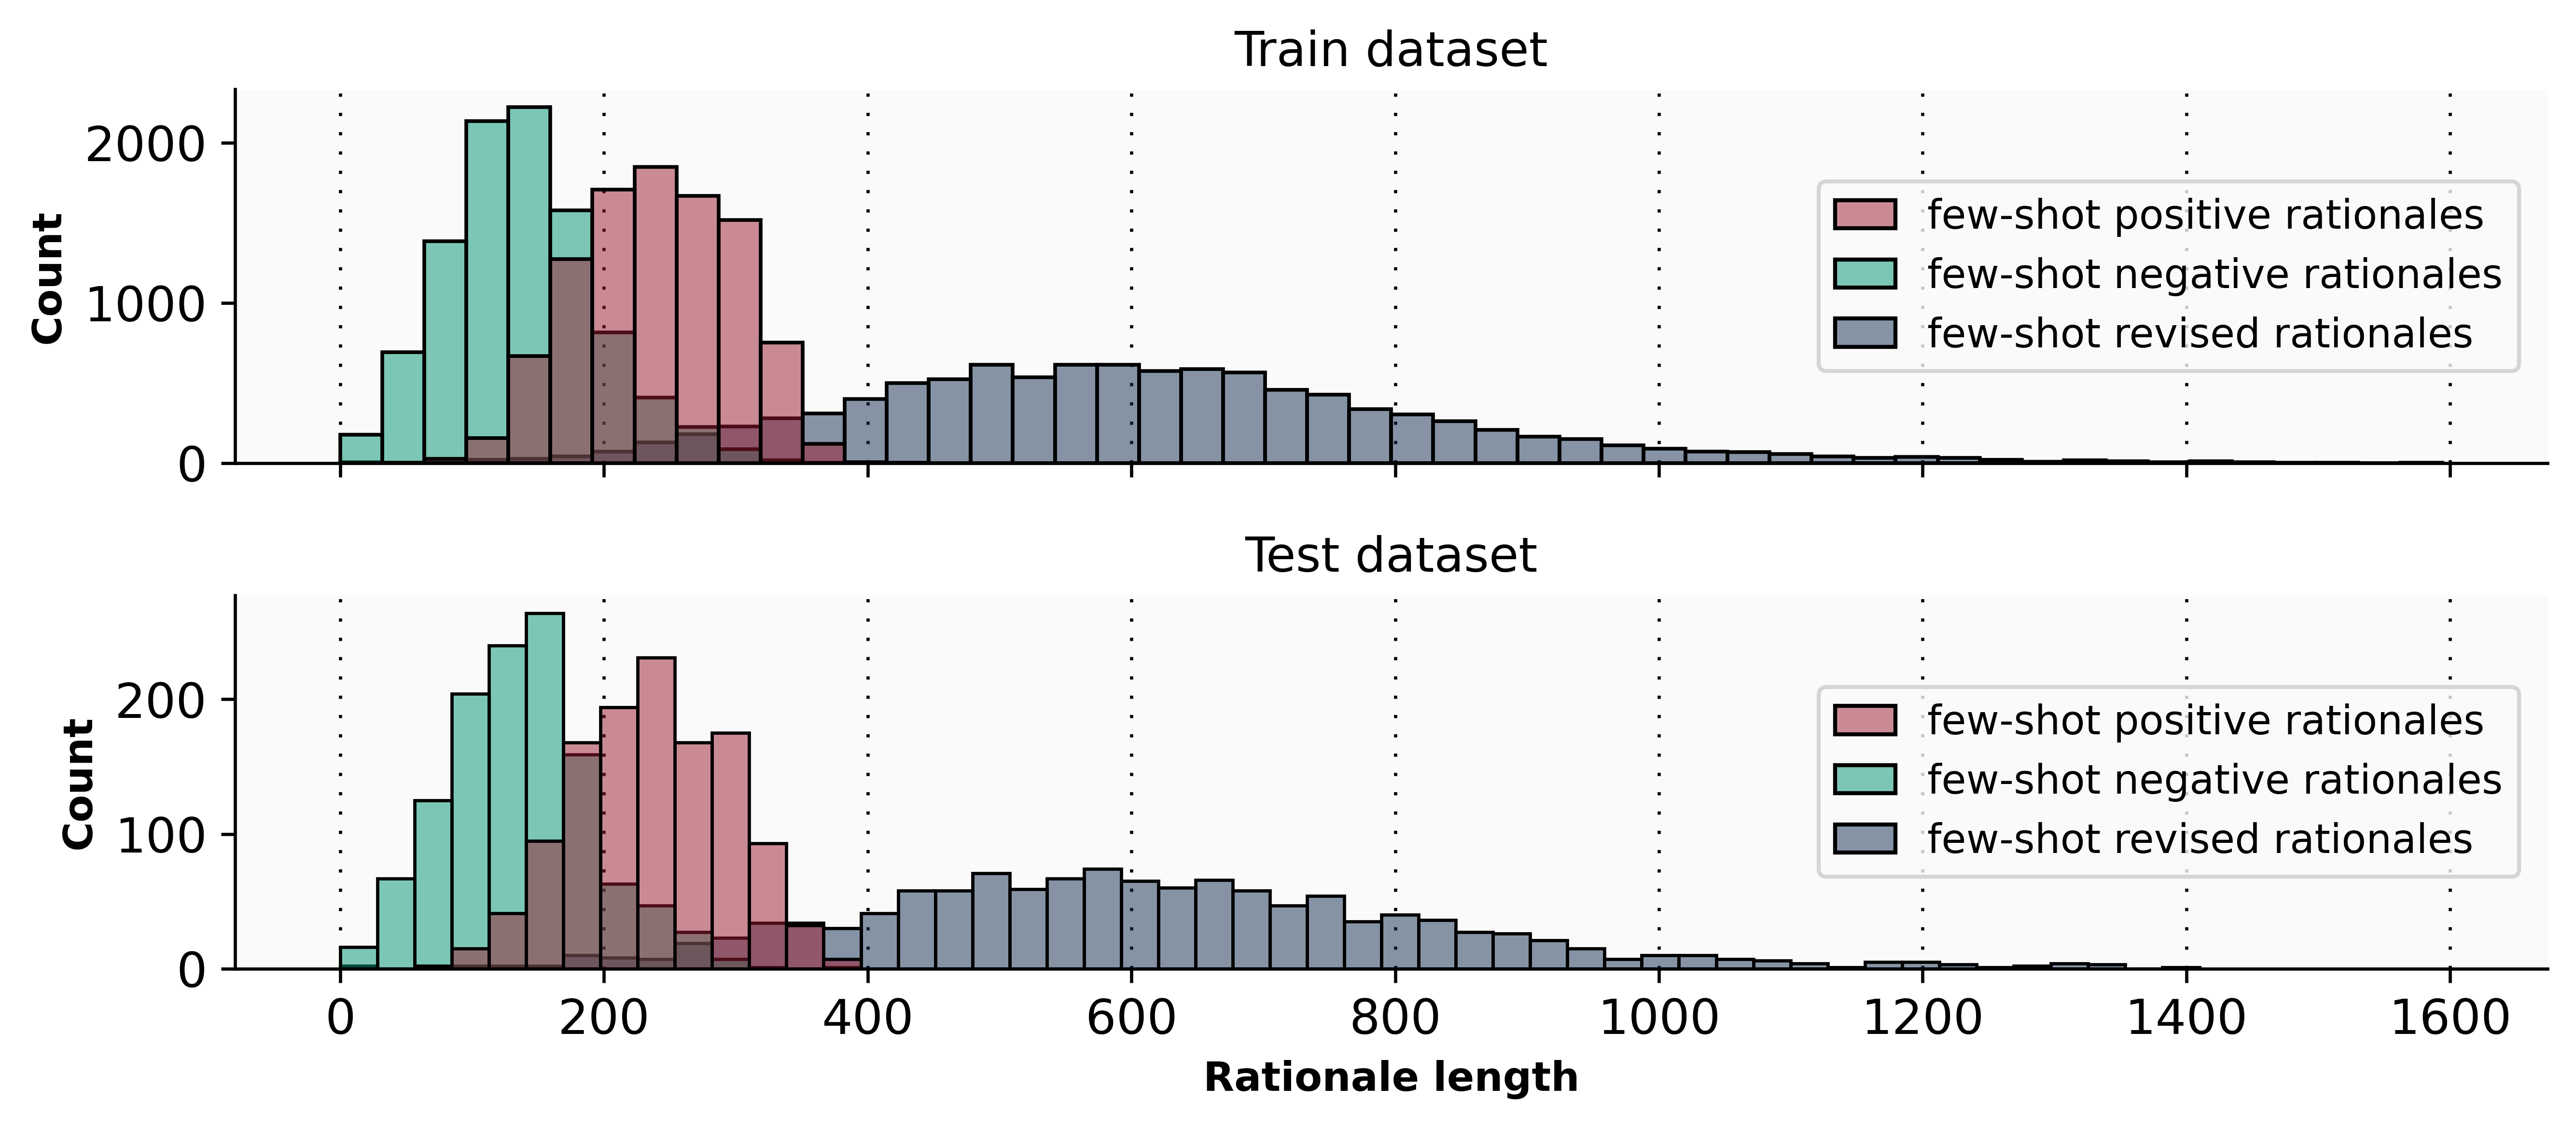

In [21]:
titles = ("Train dataset", "Test dataset")
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(9,4), sharex=True)

for i, dataset in enumerate([train_lengths, test_lengths]):
    plot = sns.histplot(
        data=dataset,
        ax=axs[i],
        multiple="layer",
        bins=50,
        )
    
    # axs[i].legend(loc="center right")
    sns.move_legend(axs[i], loc="center right")
    axs[i].set_xlabel('Rationale length')
    axs[i].set_ylabel('Count')
    axs[i].set_title(titles[i])
    axs[i].spines["left"].set_visible(True)

for ax in axs: ax.grid(axis="x")
plt.tight_layout()

In [6]:
fig.savefig("../figures/rationale_length_dist.png", dpi=300)